In [2]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import pickle
from IPython.display import Image, display

In [3]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    print(directory)
    treefiles = glob.glob(f'{directory}*tree_*')
    num_trees_per_strat = len(treefiles)/2
    for i in range(0, int(num_trees_per_strat)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
def show_stats(directory):
    f = glob.glob(f'{directory}*experiment_stats')[0]
    print(f)
#                                 experiment_stats
#     file = open('../intro_example/experiment_stats')
    df = pd.read_csv(f)
    print(df)
    return df

def show_user_inputs(directory):
    f = glob.glob(f'{directory}sampled*')[0]
    df = pd.read_csv(f)
    print(list(df))
    return df[['text', 'expected_label', 'model_pred', 'id']].sort_values(by=['text'])

def view_repair_bookkeeping_results(directory):
    print(glob.glob(f'{directory}*book_keeping_dict*'))
    f = glob.glob(f'{directory}*book_keeping_dict*')[0]
#               20230921002723fix_book_keeping_dict.pkl
    with open(f, 'rb') as file:
        # Load the object from the file
        loaded_object = pickle.load(file)
#         print("Object loaded successfully:")
#         print(loaded_object)
    return loaded_object

In [4]:
root_dir='../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/'
# dirs=['exp_test_case_naive/',
# 'exp_test_case_info/',
# 'exp_test_case_optimal/',
# 'exp_test_case_naive_deletion05/',
# 'exp_test_case_info_deletion05/',
# 'exp_test_case_optimal_deletion05/',
# 'exp_test_case_naive_deletion05pre05/',
# 'exp_test_case_info_deletion05pre05/',
# 'exp_test_case_optimal_deletion05pre05/']
dirs = glob.glob(f'{root_dir}basics*')


../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/
../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_0_dot_file


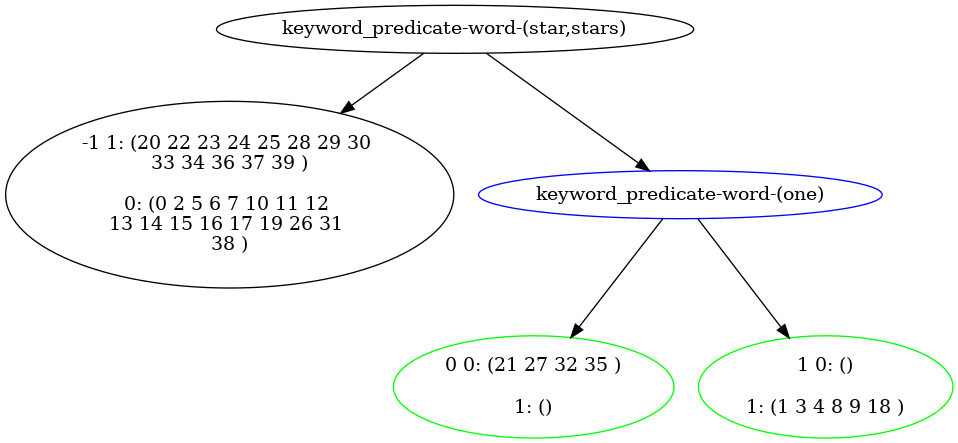



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_1_dot_file


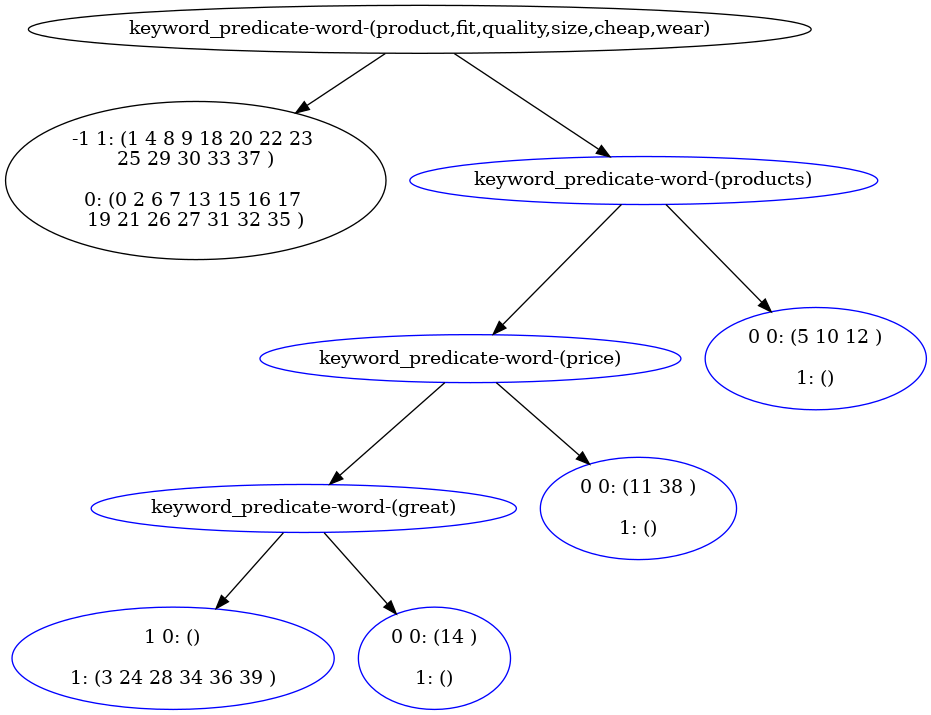



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_12_dot_file


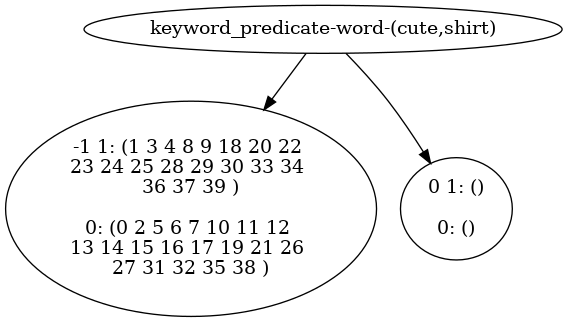



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_14_dot_file


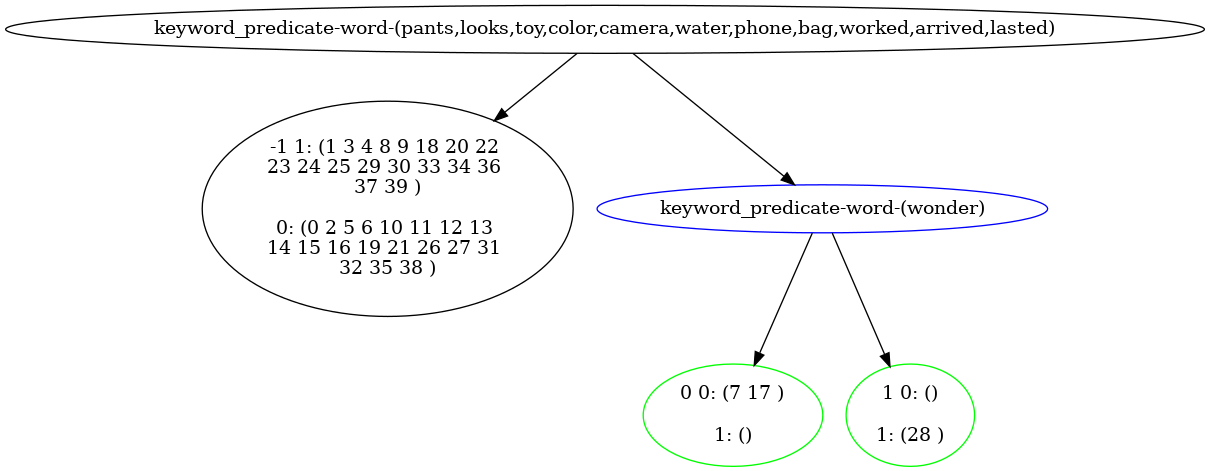



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_13_dot_file


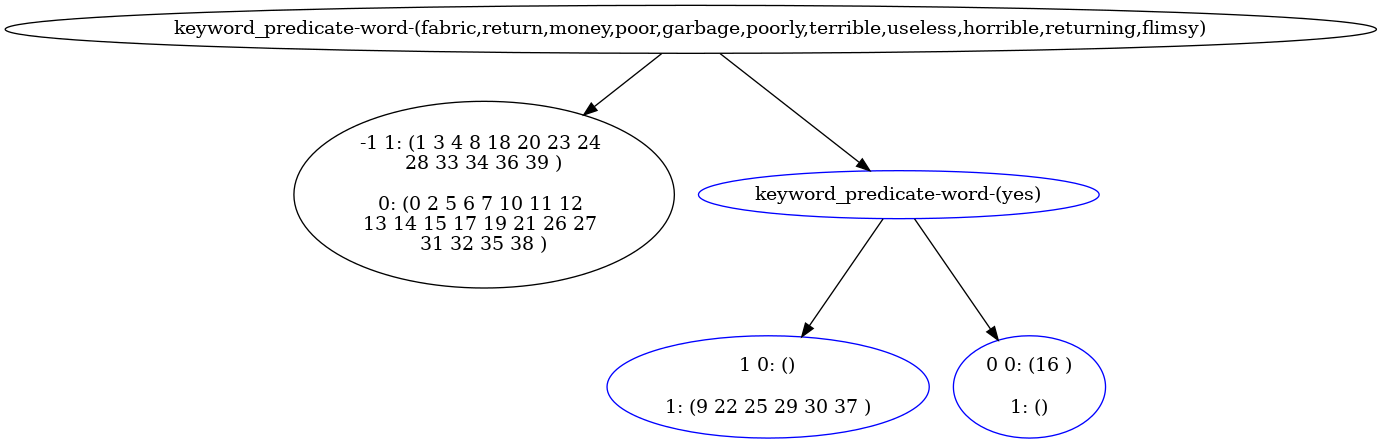



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_10_dot_file


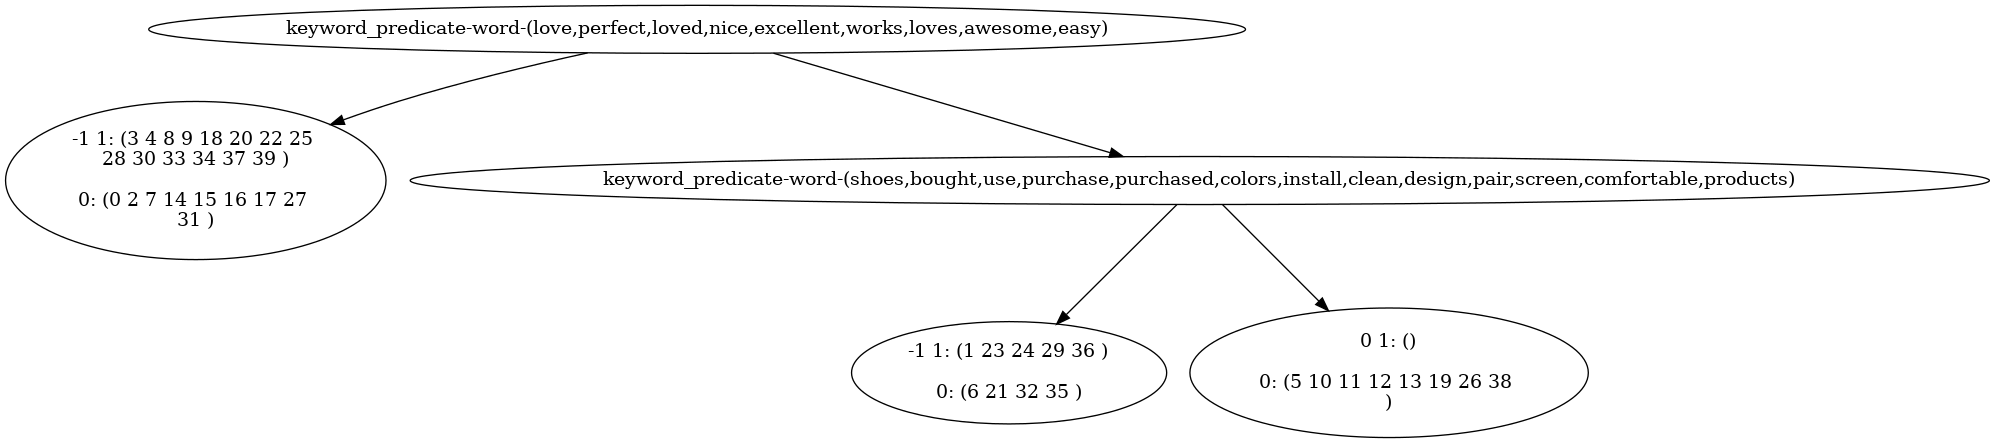



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_11_dot_file


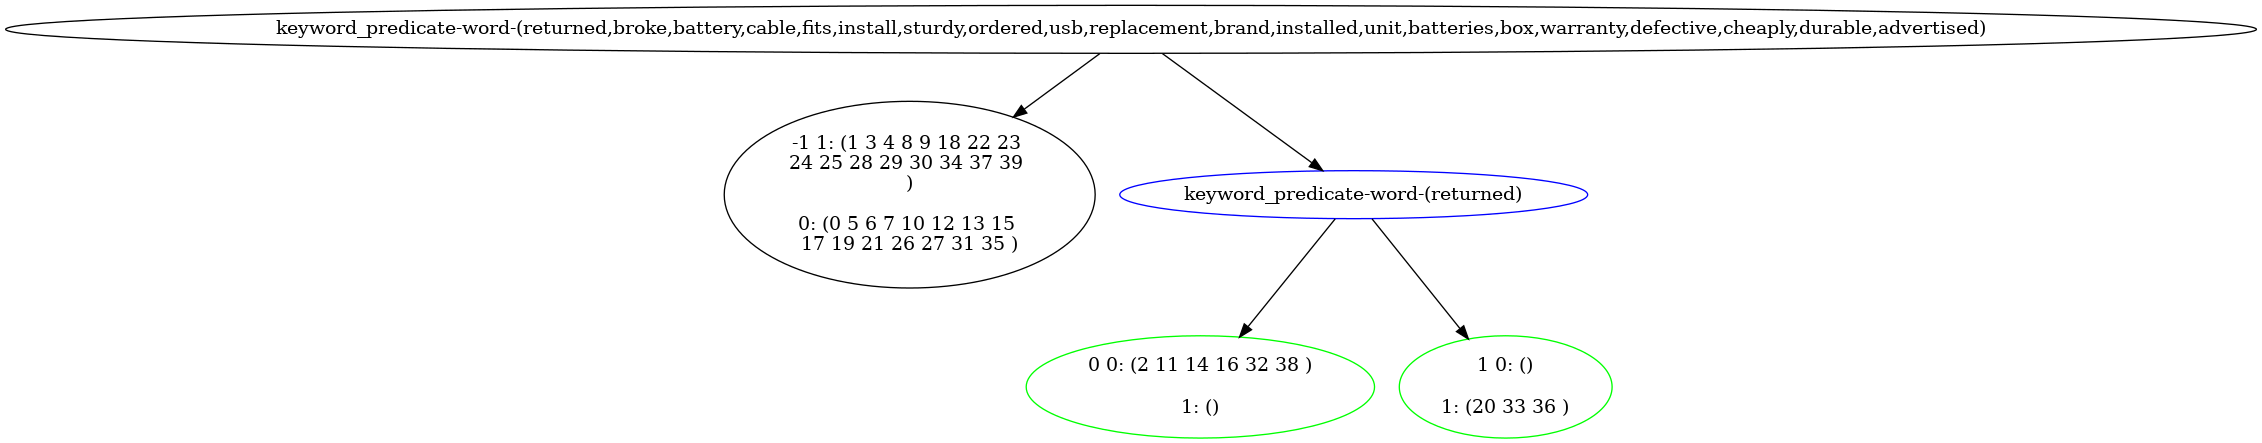



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_2_dot_file


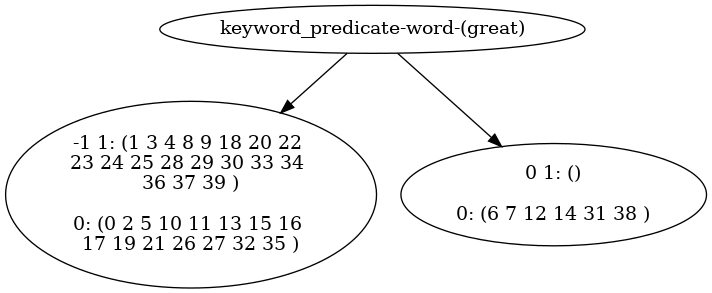



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_3_dot_file


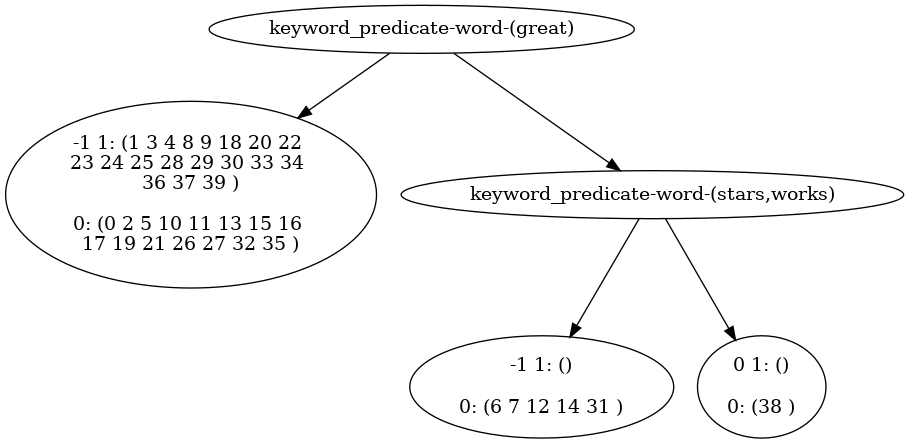



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_4_dot_file


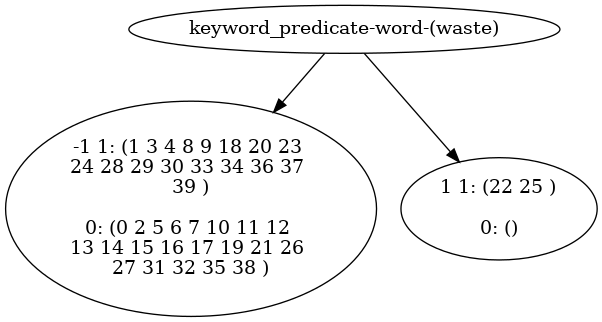



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_5_dot_file


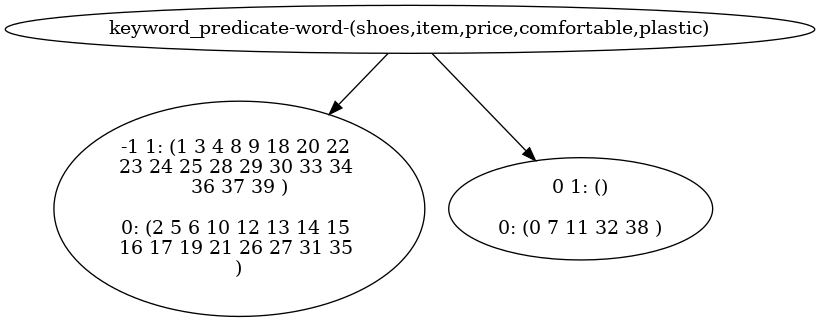



../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_tree_information_gain_6_dot_file


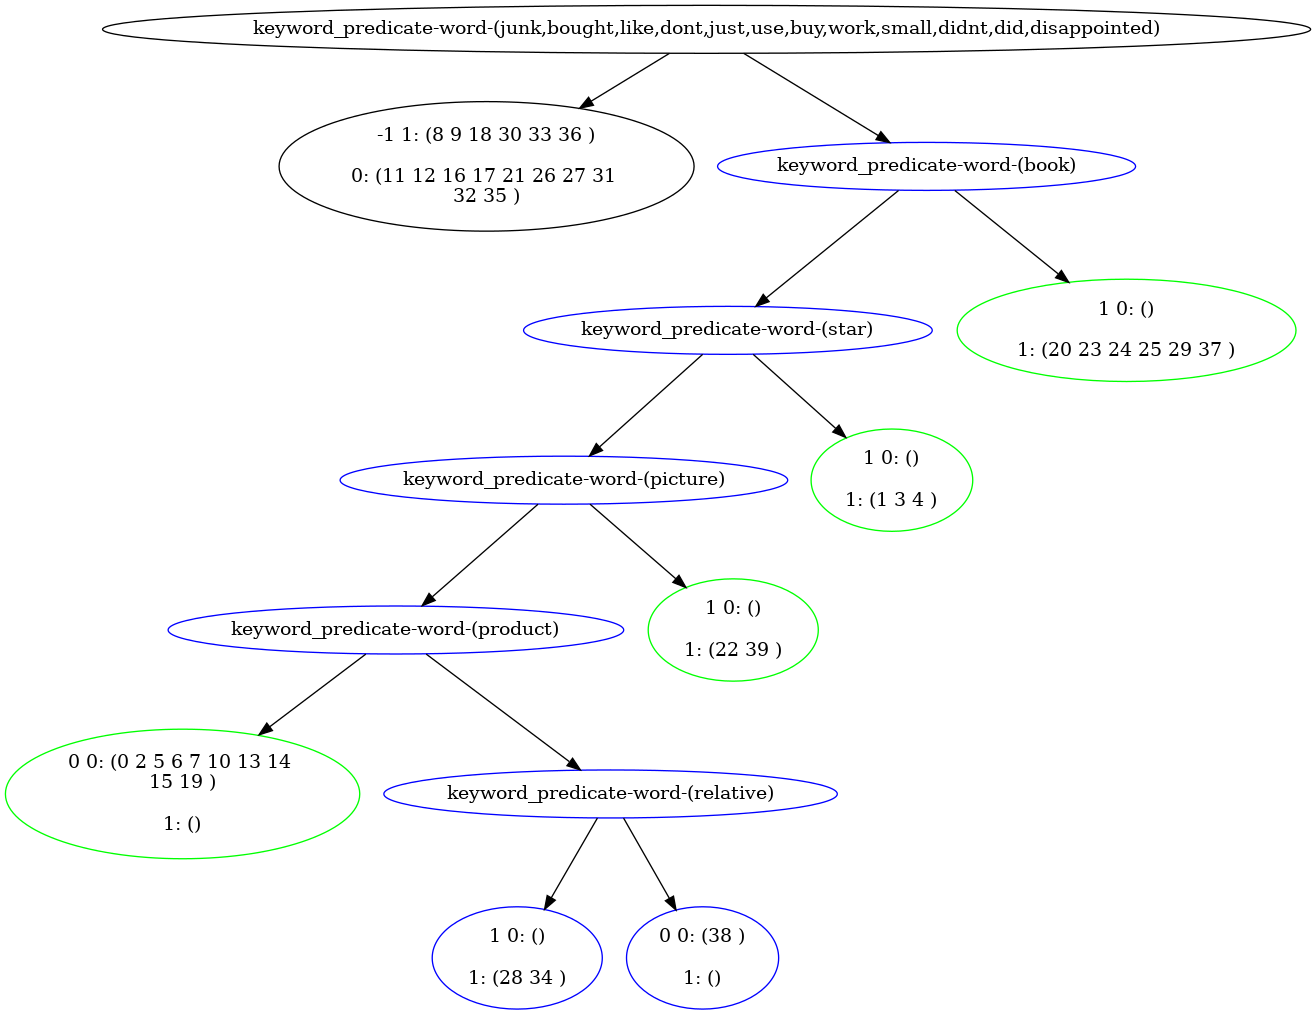

In [6]:
show_trees('../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/')

In [7]:
show_stats('../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/')

../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_experiment_stats
              strat  rbbm_runtime  bbox_runtime  avg_tree_size_increase  \
0  information_gain         3.531      1865.175                     3.6   

   user_input_size  complaint_ratio  num_complaints  num_confirmations  \
0               40              0.5              20                 20   

   global_accuracy  fix_rate  confirm_preserve_rate  new_global_accuracy  \
0            0.643      0.75                    1.0                0.831   

   prev_signaled_cnt  new_signaled_cnt  num_functions  deletion_factor  \
0             184548            184548             15              0.0   

   post_fix_num_funcs  num_of_funcs_processed_by_algo  complaint_reached_max  \
0                  15                              15                  False   

   confirm_reached_max  lf_source  retrain_after_percent  \
0                False  undefined                      1   

   ret

,strat,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,3.531,1865.175,3.6,40,0.5,20,20,0.643,0.75,1.0,0.831,184548,184548,15,0.0,15,15,False,False,undefined,1,1,False,0.0


In [10]:
df = pd.read_csv('../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/sampled_user_input_20230930151022_information_gain_40.csv')

# sample results before the fix

In [16]:
df[df['id'].isin([1,3,4,8,9,18,21,27,32,35])]

,old_text,expected_label,fold,cid,text,model_pred,vectors,id
1,one star this didnt work the only thing that works are the shooters,1,1.0,181888,one star this didnt work the only thing that works are the shooters,0,"0,-1,-1,-1,-1,-1,1,-1,0,-1,-1,-1,-1,-1,-1",1
3,one star did not fit my device at all i have no use for these,1,0.0,165757,one star did not fit my device at all i have no use for these,0,"0,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",3
4,one star aweful dont rent or buy it kept waiting for something to happen,1,0.0,132542,one star aweful dont rent or buy it kept waiting for something to happen,0,"0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1",4
8,one star very bad,1,0.0,126009,one star very bad,0,"0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",8
9,one star rather poorly written needs more content and an editor,1,0.0,130640,one star rather poorly written needs more content and an editor,0,"0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1",9
18,one star not my subject of interest to dark,1,0.0,123203,one star not my subject of interest to dark,0,"0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",18
21,five stars love these dies many sizes are so nice to have in my collection,0,0.0,66519,five stars love these dies many sizes are so nice to have in my collection,0,"0,-1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,-1",21
27,five stars very soft and comfy,0,0.0,33924,five stars very soft and comfy,0,"0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1",27
32,five stars awesome for the price lightweight and sturdy,0,0.0,59070,five stars awesome for the price lightweight and sturdy,0,"0,-1,-1,-1,-1,0,-1,-1,0,0,-1,1,-1,-1,-1",32
35,five stars ast deliveryproduct works fine,0,0.0,5299,five stars ast deliveryproduct works fine,0,"0,-1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,-1",35


In [12]:
df_result = pd.read_csv('../../rbbm_src/experiment_results_folders/experiment_lf_amazon_20230930151022/20230930151022_after_fix_results.csv')

In [14]:
list(df_result)

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors']

# result after fix

In [15]:
df_result[df_result['cid'].isin([181888])]

,old_text,expected_label,fold,cid,text,model_pred,vectors
184023,one star this didnt work the only thing that works are the shooters,1,1.0,181888,one star this didnt work the only thing that works are the shooters,1,"1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1"
